2024-03-19 19:18:18.312955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[1080.  459.]
 [ 990.  548.]
 [ 921.  532.]
 [1016.  443.]]
Projective transformation:
[[ 2.02047046e+00  6.61363234e-05 -3.52320840e+02]
 [ 2.81858442e-01  1.06452280e+00 -1.70276757e+02]
 [ 6.44282931e-04 -2.06830652e-04  1.00000000e+00]]
Collision area:
[[1417  160]
 [1436  160]
 [1715  743]
 [1554  763]]


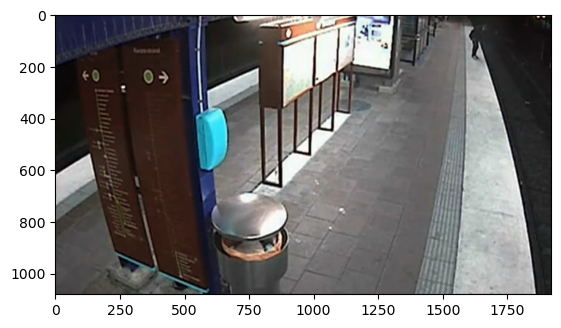

sum_intensities
3
sum_intensities_FIRST_TRAIN
12
person_on_main_track
0


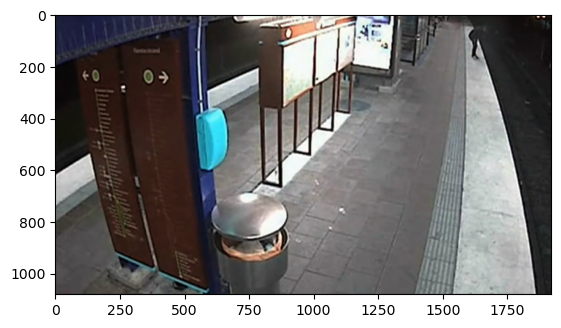

sum_intensities
751
sum_intensities_FIRST_TRAIN
491
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


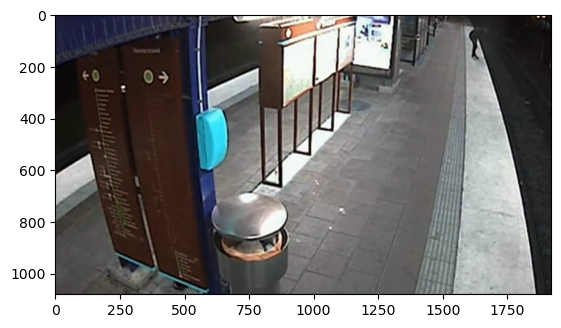

sum_intensities
157
sum_intensities_FIRST_TRAIN
423
person_on_main_track
0


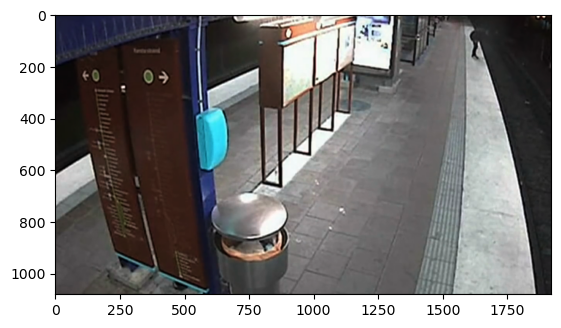

sum_intensities
645
sum_intensities_FIRST_TRAIN
583
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


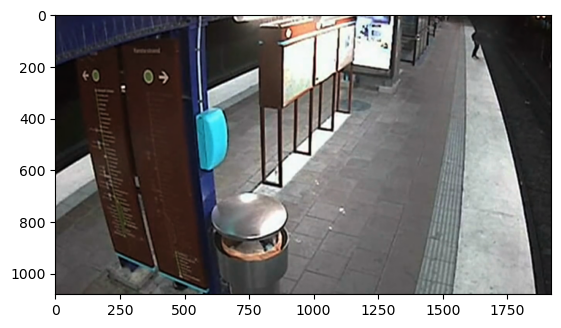

sum_intensities
774
sum_intensities_FIRST_TRAIN
690
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


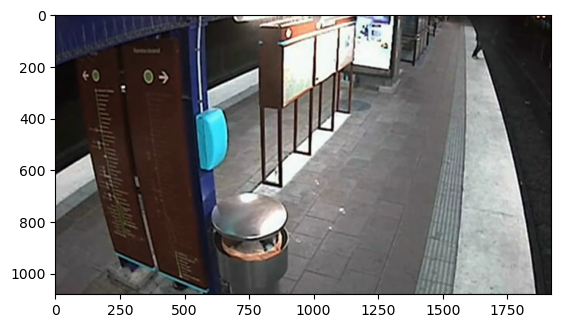

sum_intensities
825
sum_intensities_FIRST_TRAIN
183
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


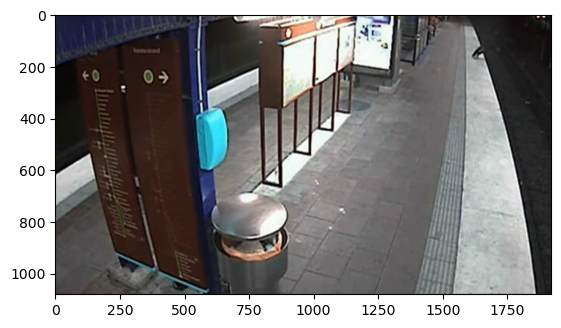

sum_intensities
639
sum_intensities_FIRST_TRAIN
1000
person_on_main_track
1
PERSON ON THE MAIN TRACK!!!!----------------------------


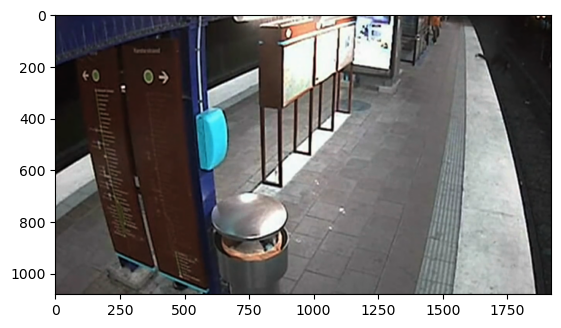

sum_intensities
424
sum_intensities_FIRST_TRAIN
828
person_on_main_track
1
PERSON ON THE MAIN TRACK!!!!----------------------------


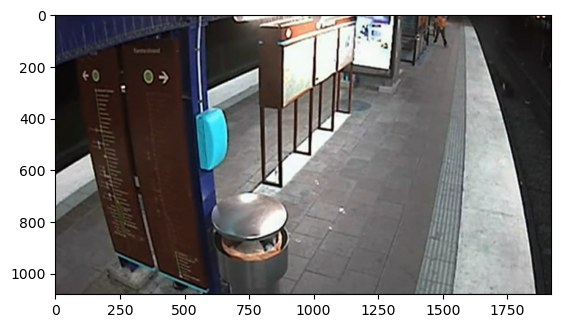

sum_intensities
159
sum_intensities_FIRST_TRAIN
1134
person_on_main_track
1
PERSON ON THE MAIN TRACK!!!!----------------------------


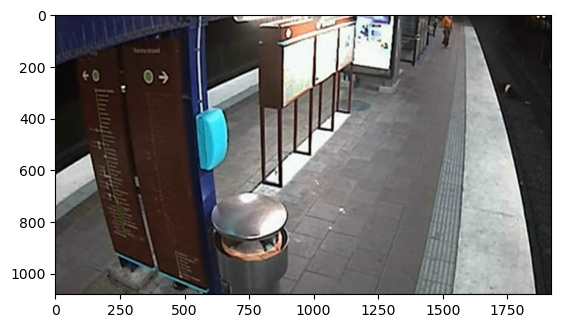

sum_intensities
14
sum_intensities_FIRST_TRAIN
635
person_on_main_track
0


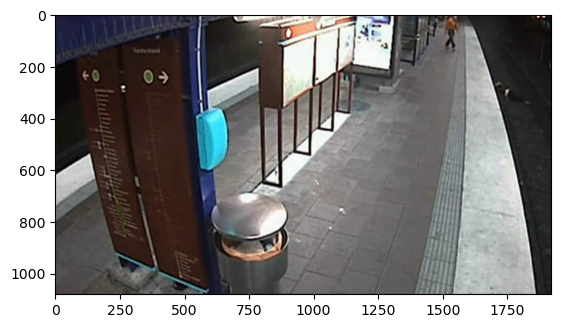

sum_intensities
12
sum_intensities_FIRST_TRAIN
661
person_on_main_track
0


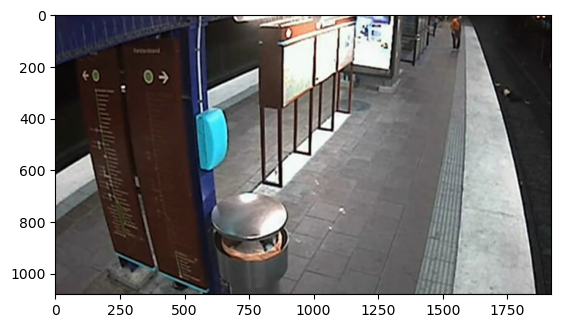

sum_intensities
9
sum_intensities_FIRST_TRAIN
656
person_on_main_track
0


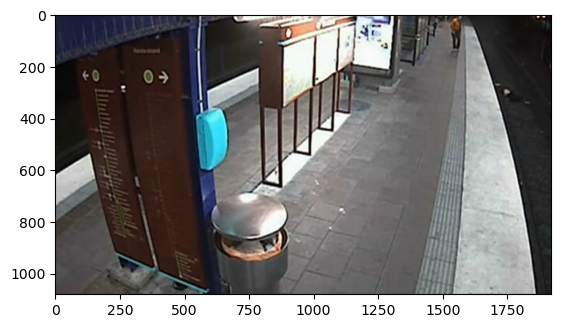

sum_intensities
7
sum_intensities_FIRST_TRAIN
653
person_on_main_track
0


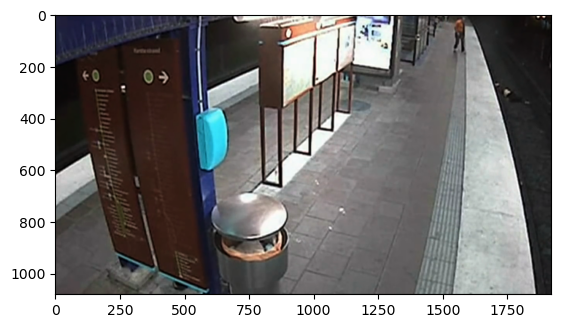

sum_intensities
293
sum_intensities_FIRST_TRAIN
645
person_on_main_track
0


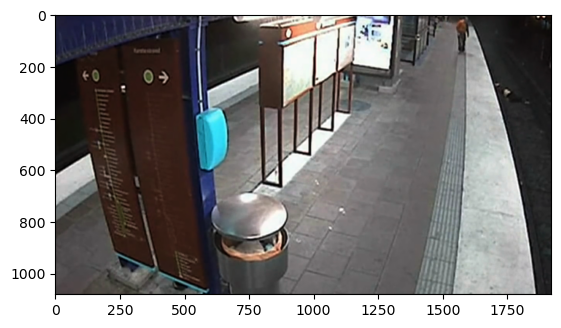

sum_intensities
730
sum_intensities_FIRST_TRAIN
641
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


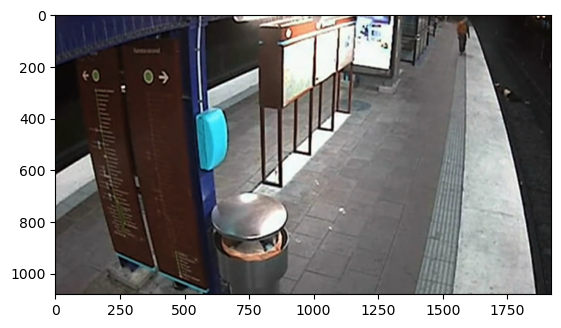

sum_intensities
537
sum_intensities_FIRST_TRAIN
638
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


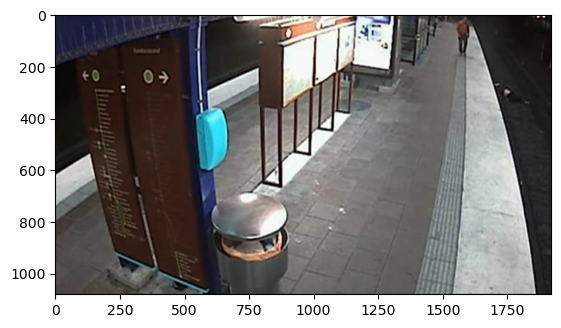

sum_intensities
714
sum_intensities_FIRST_TRAIN
635
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


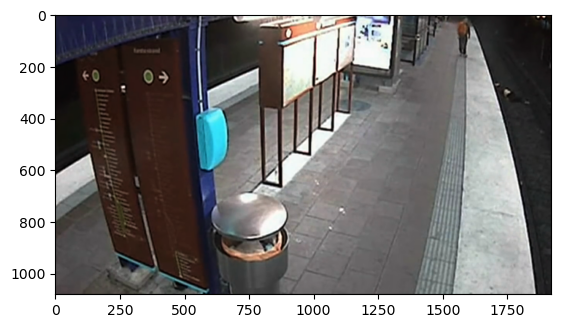

sum_intensities
542
sum_intensities_FIRST_TRAIN
632
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


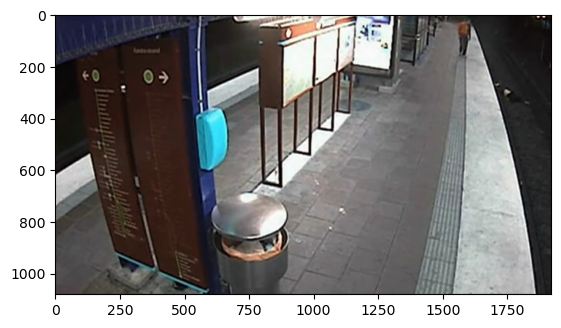

sum_intensities
701
sum_intensities_FIRST_TRAIN
628
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


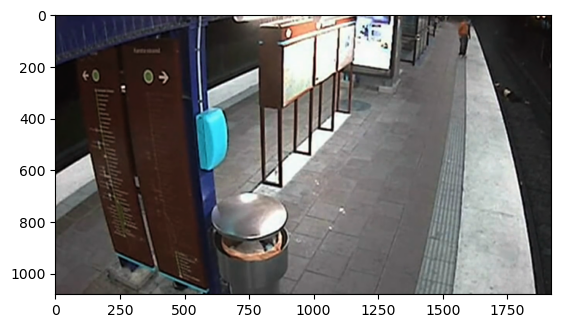

sum_intensities
359
sum_intensities_FIRST_TRAIN
626
person_on_main_track
0


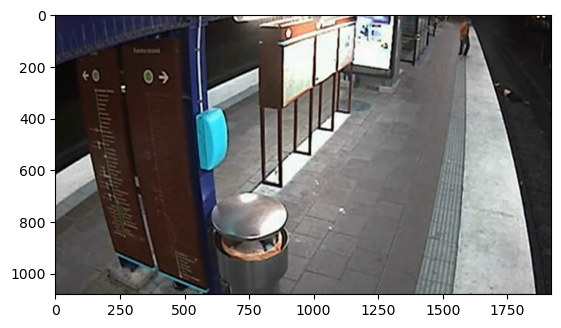

sum_intensities
723
sum_intensities_FIRST_TRAIN
35
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


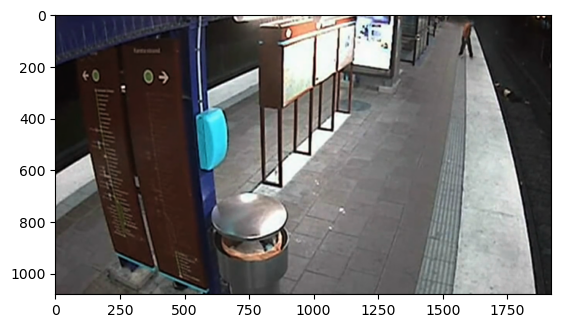

sum_intensities
1041
sum_intensities_FIRST_TRAIN
303
person_on_main_track
0
PROXIMITY WARNING!!!!!!!!!!!!-------------


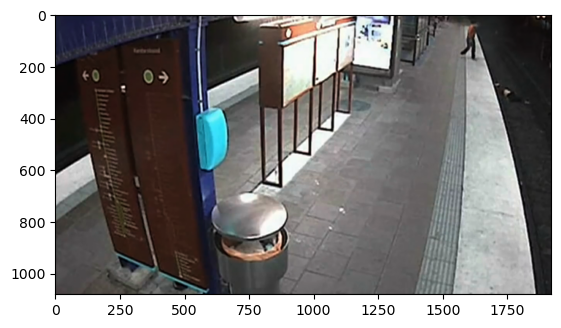

sum_intensities
1674
sum_intensities_FIRST_TRAIN
887
person_on_main_track
1
PERSON ON THE MAIN TRACK!!!!----------------------------


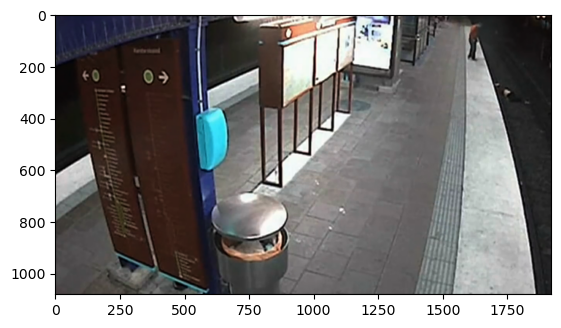

sum_intensities
1362
sum_intensities_FIRST_TRAIN
989
person_on_main_track
1
PERSON ON THE MAIN TRACK!!!!----------------------------


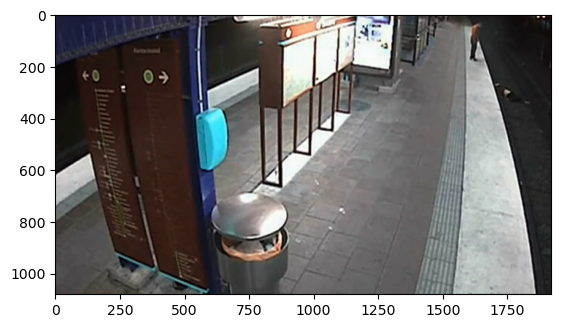

sum_intensities
1132
sum_intensities_FIRST_TRAIN
1004
person_on_main_track
1
PERSON ON THE MAIN TRACK!!!!----------------------------


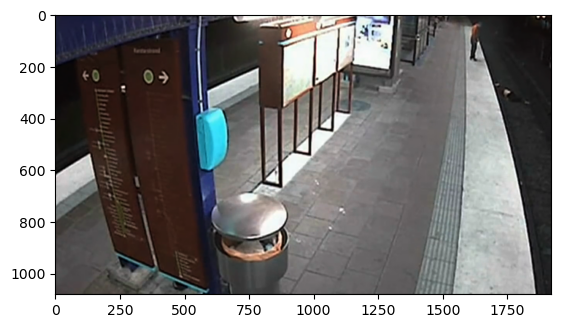

In [ ]:
import cv2 
import mediapipe as mp
import torch
import time
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import arccos, array
from numpy.linalg import norm
from PIL import Image as im 


def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)




def click_event(event, x, y, flags, params): 
	# checking for left mouse clicks 
	if event == cv2.EVENT_LBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		
		points.append([x,y,1])
        
        
        

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
        
		cv2.circle(current_frame,(x,y),2,(0,0,255), thickness=1)
		cv2.imshow('Select 4 points to compute the projective transformation', current_frame) 

	# checking for right mouse clicks	 
	if event==cv2.EVENT_RBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 
        
		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 

		b = current_frame[y, x, 0] 
		g = current_frame[y, x, 1] 
		r = current_frame[y, x, 2] 
		
		cv2.imshow('Select 4 points to compute the projective transformation', current_frame)
        
        
def click_event_dangerous_area(event, x, y, flags, params): 
	# checking for left mouse clicks 
	if event == cv2.EVENT_LBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		
		points.append([x,y,1])
        
        
        

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
        
		cv2.circle(out,(x,y),2,(0,0,255), thickness=1)
		cv2.imshow('Select 4 points to compute the dangerous area inside the platform',out) 

	# checking for right mouse clicks	 
	if event==cv2.EVENT_RBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 
        
		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 

		b = current_frame[y, x, 0] 
		g = current_frame[y, x, 1] 
		r = current_frame[y, x, 2] 
		
		cv2.imshow('Select 4 points to compute the dangerous area inside the platform', out)
        
        

def click_event_dangerous_area_main_track(event, x, y, flags, params): 
	# checking for left mouse clicks 
	if event == cv2.EVENT_LBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		
		points.append([x,y,1])
        
        
        

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
        
		cv2.circle(out,(x,y),2,(0,0,255), thickness=1)
		cv2.imshow('Select 4 points to compute the area inside the main track',out) 

	# checking for right mouse clicks	 
	if event==cv2.EVENT_RBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 
        
		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 

		b = current_frame[y, x, 0] 
		g = current_frame[y, x, 1] 
		r = current_frame[y, x, 2] 
		
		cv2.imshow('Select 4 points to compute the area inside the main track', out)
        

        
        






# creating object 
fgbg1 = cv2.createBackgroundSubtractorMOG2(5); 

# capture frames from a camera 
cap = cv2.VideoCapture('train_accident1.mp4');

    

    


fps = cap.get(cv2.CAP_PROP_FPS)
skip=int(fps /4)
nFrame=0
points=[]





ret, current_frame = cap.read()
previous_frame = current_frame






points=[]

first_frame= current_frame

if ret:
    #cv2.imshow('Select 4 points to compute the projective transformation', current_frame) 
    #cv2.setMouseCallback('Select 4 points to compute the projective transformation', click_event) 
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows() 
    
    



    #input_pts = np.float32([[points[0][0],points[0][1]],[points[1][0],points[1][1]],[points[2][0],points[2][1]],[points[3][0],points[3][1]]])
    output_pts = np.float32([[1143,  389],[1081,  454],[1017,  442],[1088,  376]])
    
    
    input_pts=np.float32([[1080,  459],[ 990,  548],[ 921,  532],[1016,  443]])
    
    print(input_pts)
 
    # Compute the perspective transform M
    M = cv2.getPerspectiveTransform(input_pts,output_pts)
    
    print("Projective transformation:")
    print(M)
 
    # Apply the perspective transformation to the image
    out = cv2.warpPerspective(current_frame,M,(current_frame.shape[1]+200, current_frame.shape[0]+50),flags=cv2.INTER_LINEAR)
    
    

    points=[]
    cv2.imshow('Select 4 points to compute the dangerous area inside the platform', out) 
    cv2.setMouseCallback('Select 4 points to compute the dangerous area inside the platform', click_event_dangerous_area) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
    
    
    
    points = np.array([[points[0][0],points[0][1]], [points[1][0],points[1][1]], [points[2][0],points[2][1]],
                   [points[3][0],points[3][1]]])
    
    
    dangerous_area = np.array([[points[0][0],points[0][1]], [points[1][0],points[1][1]], 
                                [points[2][0],points[2][1]], [points[3][0],points[3][1]]], np.int32)
    
    
    dangerous_area_points = np.array([[[points[0][0],points[0][1]], [points[1][0],points[1][1]], 
                                [points[2][0],points[2][1]], [points[3][0],points[3][1]]]])
    
    print("Collision area:")
    print(points)
 
    cv2.fillPoly(out, pts=[points], color=(0, 255, 0))
    
    cv2.imshow('Dangerous area inside the platform', out) 
 
    cv2.waitKey(0)

    cv2.destroyAllWindows()
    
    
    
    
    
    points=[]
    cv2.imshow('Select 4 points to compute the area inside the main track', out) 
    cv2.setMouseCallback('Select 4 points to compute the area inside the main track', click_event_dangerous_area_main_track) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
    
    
    
    points = np.array([[points[0][0],points[0][1]], [points[1][0],points[1][1]], [points[2][0],points[2][1]],
                   [points[3][0],points[3][1]]])
    
    

    
    dangerous_area_main_track_points = np.array([[[points[0][0],points[0][1]], [points[1][0],points[1][1]], 
                                [points[2][0],points[2][1]], [points[3][0],points[3][1]]]])
    
    
    cv2.fillPoly(out, pts=[points], color=(0, 0, 255))
    
    cv2.imshow('Dangerous area inside main track', out) 
 
    cv2.waitKey(0)

    cv2.destroyAllWindows()
    
    
    
    


    

    
while cv2.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv2.waitKey()
        break
        
    if nFrame % skip == 0:
        
        cv2.waitKey(5000)
        # apply mask for background subtraction 
        fgmask1 = fgbg1.apply(frame); 
        frameWidth = frame.shape[1]
        frameHeight = frame.shape[0]

        frame = gammaCorrection(frame, 0.8)
        person_on_main_track=0
        person_on_second_track=0

        
        plt.imshow(frame)
        %matplotlib inline

        plt.show()

        cv2.imshow('Original', frame); 
       

        _, frame_diff = cv2.threshold(fgmask1,250,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        transformed_frame_diff=cv2.warpPerspective(frame_diff,M,(frame_diff.shape[1]+200, frame_diff.shape[0]+400),flags=cv2.INTER_LINEAR)
        cv2.imshow('frame difference ',transformed_frame_diff) 
        
        
        
        height = transformed_frame_diff.shape[0]
        width = transformed_frame_diff.shape[1]
        mask = np.zeros((height, width), dtype=np.uint8)





        cv2.fillPoly(mask, dangerous_area_points, (255))

        res = cv2.bitwise_and(transformed_frame_diff,transformed_frame_diff,mask = mask)

        rect = cv2.boundingRect(dangerous_area_points)
        cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
       
        totalLabels, label_ids, values, centroid = cv2.connectedComponentsWithStats(cropped,4,cv2.CV_32S)
        maxArea=0
        maxIndex=0
        for i in range(1, totalLabels): 
            area = values[i, cv2.CC_STAT_AREA]   

            if area > maxArea:
                maxArea=area
                maxIndex=i


        sum_intensities=maxArea
        
        cv2.imshow('dangerous area in the platform',cropped)

        print("sum_intensities")
        print(sum_intensities)
        
        cv2.fillPoly(mask, dangerous_area_main_track_points, (255))

        res = cv2.bitwise_and(transformed_frame_diff,transformed_frame_diff,mask = mask)

        rect = cv2.boundingRect(dangerous_area_main_track_points)
        cropped_main_track = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]



        totalLabels, label_ids, values, centroid = cv2.connectedComponentsWithStats(cropped_main_track, connectivity=4)

        maxArea=0
        maxIndex=0
        for i in range(1, totalLabels): 
            area = values[i, cv2.CC_STAT_AREA] 
            
            if area > 800:
                person_on_main_track=1

            if area > maxArea:
                maxArea=area
                maxIndex=i


        sum_intensities_main_track=maxArea
        
        cv2.imshow('dangerous area main track',cropped_main_track)

        print("sum_intensities_FIRST_TRAIN")
        print(sum_intensities_main_track)
        
        print("person_on_main_track")
        print(person_on_main_track)
        
       


        #cv2.imshow('dangerous area secondary track',cropped_secondary_track)


        
        people_beyond_yellow_line=sum_intensities > 500;
        
       

        train_main_track=sum_intensities_main_track > 1700;

    

        
        if person_on_main_track==1 and not train_main_track:

            cv2.waitKey(5000)
            text = "Person on the main track alarm"
            coordinates = (100,100)
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale =1
            color = (255,0,0)
            thickness = 2
            dangerous_situation = cv2.putText(frame, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
            cv2.imshow("Person on the main track alarm", dangerous_situation)
            cv2.waitKey(500)
            cv2.destroyAllWindows()
            print("PERSON ON THE MAIN TRACK!!!!----------------------------")
            
        elif people_beyond_yellow_line and not train_main_track:

            cv2.waitKey(5000)
            text = "Proximity warning"
            coordinates = (100,100)
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale =1
            color = (255,0,0)
            thickness = 2
            dangerous_situation = cv2.putText(frame, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
            cv2.imshow("Proximity warning", dangerous_situation)
            cv2.waitKey(500)
            cv2.destroyAllWindows()
            print("PROXIMITY WARNING!!!!!!!!!!!!-------------")
            
        
       
        

    
    nFrame=nFrame+1          
cap.release()
cv2.destroyAllWindows()
    